<a href="https://colab.research.google.com/github/StanleyLiangYork/Advance_NN_techniques/blob/main/customized_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from shutil import copy2

In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [3]:
root = os.getcwd()
copy2(train_dataset_fp, root)

'/content/iris_training.csv'

In [4]:
! head -n5 iris_training.csv

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [5]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [6]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [7]:
batch_size = 64

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [8]:
features, labels = next(iter(train_dataset))

print(features)
print(labels)

OrderedDict([('sepal_length', <tf.Tensor: shape=(64,), dtype=float32, numpy=
array([7.7, 4.8, 5.4, 5. , 6.1, 6.4, 4.9, 6.8, 4.8, 4.8, 5. , 7.7, 5.8,
       4.4, 6.6, 4.4, 5.4, 5.6, 7.7, 5.5, 5.1, 6. , 5.8, 5.9, 5.8, 6.8,
       5.6, 6.7, 5.7, 6.5, 5.4, 5.1, 4.9, 6.5, 7.9, 7.6, 5.5, 5.1, 6.6,
       5. , 5. , 5.7, 6.2, 4.9, 6.9, 7.3, 6.5, 6.1, 4.7, 7.2, 4.9, 5.1,
       4.8, 6.3, 5.7, 5.8, 6.4, 6.7, 6. , 6.8, 6.7, 6. , 6.4, 5.7],
      dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(64,), dtype=float32, numpy=
array([3. , 3. , 3.9, 3.2, 3. , 2.8, 3. , 2.8, 3. , 3.4, 3.4, 2.8, 4. ,
       3.2, 3. , 2.9, 3. , 2.9, 3.8, 2.4, 2.5, 2.7, 2.7, 3.2, 2.7, 3.2,
       2.5, 3.3, 2.8, 3. , 3.4, 3.5, 2.4, 3. , 3.8, 3. , 2.6, 3.8, 2.9,
       3.5, 3. , 3. , 2.8, 3.1, 3.1, 2.9, 2.8, 2.6, 3.2, 3.2, 3.1, 3.8,
       3.1, 2.7, 3.8, 2.8, 2.8, 3. , 2.9, 3. , 3.1, 3. , 3.2, 4.4],
      dtype=float32)>), ('petal_length', <tf.Tensor: shape=(64,), dtype=float32, numpy=
array([6.1, 1.4, 1.3, 1.2, 4.9, 5.6,

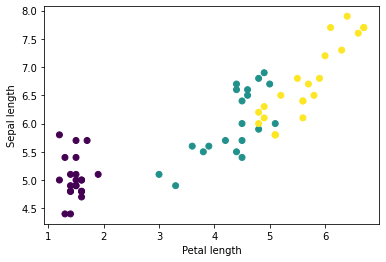

In [9]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [10]:
def pack_features_vector(features, labels):
  """Pack the features from a collection to a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [11]:
train_dataset = train_dataset.map(pack_features_vector)

In [12]:
features, labels = next(iter(train_dataset))

print(features[:5])
print(labels[:5])

tf.Tensor(
[[5.1 3.8 1.9 0.4]
 [5.8 2.7 5.1 1.9]
 [6.3 3.4 5.6 2.4]
 [4.6 3.4 1.4 0.3]
 [6.9 3.1 5.1 2.3]], shape=(5, 4), dtype=float32)
tf.Tensor([0 2 2 0 2], shape=(5,), dtype=int32)


Create a simple NN model

In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

Check the output dimension

In [14]:
predictions = model(features)

In [15]:
print(predictions.shape)
print(predictions[0,:])

(64, 3)
tf.Tensor([-1.43809    -2.1324365   0.24008483], shape=(3,), dtype=float32)


In [16]:
tf.nn.softmax(predictions[0,:])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.14587526, 0.0728502 , 0.78127456], dtype=float32)>

In [17]:
print("Prediction: {}".format(tf.argmax(predictions[:5], axis=1)))
print("    Labels: {}".format(labels[:5]))

Prediction: [2 2 2 2 2]
    Labels: [0 2 2 0 2]


Use the SparseCategorical Crossentropy for multi-class

In [18]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_hat = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_hat)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.540482521057129


Record the gradients for back prop

In [20]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [21]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.002)

Get the loss and gradient of a single optimization step:

In [22]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(), loss_value.numpy()))

Step: 0, Initial Loss: 1.540482521057129


A single gradient descend walk

In [23]:
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {}, Loss: {}".format(optimizer.iterations.numpy(), loss(model, features, labels, training=True).numpy()))

Step: 1, Loss: 1.4158402681350708


A training loop

In [24]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 200

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - batche_size = 64
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    # the weights of model are updated by this gradient descent step
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.375, Accuracy: 35.000%
Epoch 050: Loss: 0.650, Accuracy: 70.833%
Epoch 100: Loss: 0.289, Accuracy: 95.833%
Epoch 150: Loss: 0.154, Accuracy: 97.500%


Visualize the training procedure

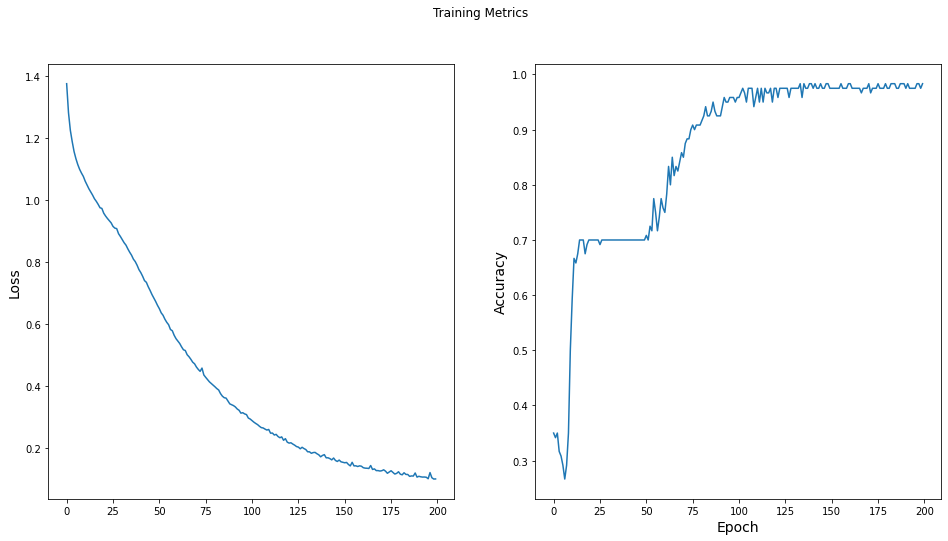

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(16, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

Load the test dataset

In [28]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [29]:
root = os.getcwd()
copy2(test_fp, root)

'/content/iris_test.csv'

In [30]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [31]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


Make a GAN
